###  Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost

#core import for hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV


%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/output/google_outliers.csv')

#### Show Top 5 Records

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year', 'month', 'day'],
      dtype='object')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.00,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018.0,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967.00,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018.0,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.00,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018.0,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,136881.75,25.0,12498500.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018.0,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.00,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018.0,6,20


#### Dropping columns that do not contribute numerically to the Regression Model

In [5]:
df.drop(columns=['Current Ver','Android Ver','App','Last Updated'],inplace=True)

#### Encoding categorical values

In [6]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,year,month,day
0,ART_AND_DESIGN,4.1,159.00,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018.0,1,7
1,ART_AND_DESIGN,3.9,967.00,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018.0,1,15
2,ART_AND_DESIGN,4.7,87510.00,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018.0,8,1
3,ART_AND_DESIGN,4.5,136881.75,25.0,12498500.0,Free,0.0,Teen,Art & Design,2018.0,6,8
4,ART_AND_DESIGN,4.3,967.00,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018.0,6,20


In [7]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

#### one-hot encoding

In [8]:
df['Type'].value_counts()

Type
Free    10040
Paid      800
Name: count, dtype: int64

In [10]:
df= pd.get_dummies(df,columns=['Type','Content Rating'],drop_first=True,dtype=int)

In [11]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Genres,year,month,day,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,ART_AND_DESIGN,4.1,159.00,19.0,10000.0,0.0,Art & Design,2018.0,1,7,0,1,0,0,0,0
1,ART_AND_DESIGN,3.9,967.00,14.0,500000.0,0.0,Art & Design;Pretend Play,2018.0,1,15,0,1,0,0,0,0
2,ART_AND_DESIGN,4.7,87510.00,8.7,5000000.0,0.0,Art & Design,2018.0,8,1,0,1,0,0,0,0
3,ART_AND_DESIGN,4.5,136881.75,25.0,12498500.0,0.0,Art & Design,2018.0,6,8,0,0,0,0,1,0
4,ART_AND_DESIGN,4.3,967.00,2.8,100000.0,0.0,Art & Design;Creativity,2018.0,6,20,0,1,0,0,0,0


#### Splitting our mathematical feature columns and assigning it to 'X'

In [12]:
# Numerical columns
[col for col in df.columns if df[col].dtypes != 'O']

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'year',
 'month',
 'day',
 'Type_Paid',
 'Content Rating_Everyone',
 'Content Rating_Everyone 10+',
 'Content Rating_Mature 17+',
 'Content Rating_Teen',
 'Content Rating_Unrated']

In [13]:
# Categorical columns
[col for col in df.columns if df[col].dtypes == 'O']

['Category', 'Genres']

In [15]:
X = df.drop(columns=['Category','Rating','Genres',"day","month","year"],axis=1)

In [16]:
X.head()

,Reviews,Size,Installs,Price,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159.00,19.0,10000.0,0.0,0,1,0,0,0,0
1,967.00,14.0,500000.0,0.0,0,1,0,0,0,0
2,87510.00,8.7,5000000.0,0.0,0,1,0,0,0,0
3,136881.75,25.0,12498500.0,0.0,0,0,0,0,1,0
4,967.00,2.8,100000.0,0.0,0,1,0,0,0,0


#### Splitting our target variable 'Rating' and assigning it to 'y'

In [17]:
y=df['Rating']

In [20]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10835    4.5
10836    5.0
10837    4.5
10838    4.5
10839    4.5
Name: Rating, Length: 10840, dtype: float64

#### Splitting up our data set into 'train' and 'test'

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32, test_size=0.3)

In [22]:
print(f'x train shape: {X_train.shape}')
print(f'x test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

x train shape: (7588, 10)
x test shape: (3252, 10)
y train shape: (7588,)
y test shape: (3252,)


#### Feature Scaling

In [23]:
scaler= StandardScaler()

X_train=scaler.fit_transform(X_train)

#transforming the test data.We avoid fitting the values to prevent data leakage!
X_test=scaler.transform(X_test)

# Linear Regression Model Training

In [24]:
regression = LinearRegression()
regression

LinearRegression()

In [25]:
regression.fit(X_train,y_train)

LinearRegression()

In [26]:
## Printing the coefficient
regression.coef_

array([ 0.16989184, -0.00205023, -0.09447741, -0.00974598,  0.03011529,
       -0.07573472, -0.03885231, -0.05762477, -0.06840007, -0.0018962 ])

In [27]:
## Printing the intercept
regression.intercept_

4.228512124406958

In [29]:
## Prediction for Test data
reg_predict = regression.predict(X_test)
reg_predict

array([4.22465366, 4.09305131, 4.17032002, ..., 4.1722164 , 4.25846359,
       4.17537176])

#### Assumptions of Linear regression

Text(0, 0.5, 'Test Predicted data')

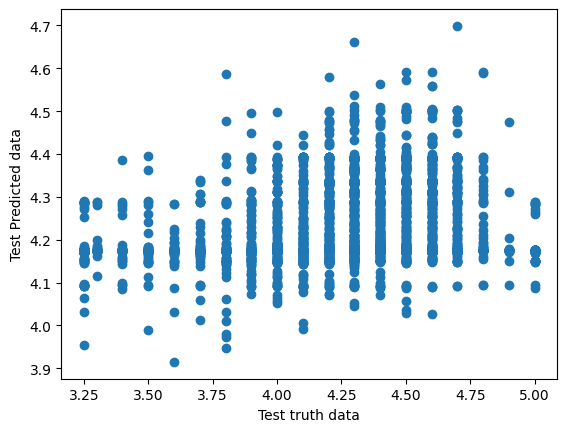

In [30]:
plt.scatter(y_test,reg_predict)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

In [31]:
## Residual
residual = y_test - reg_predict

<Axes: xlabel='Rating', ylabel='Density'>

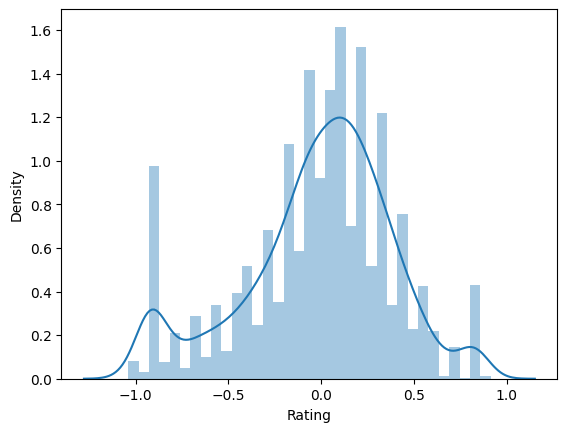

In [32]:
sns.distplot(residual,kde=True) # DIstribution of residuals

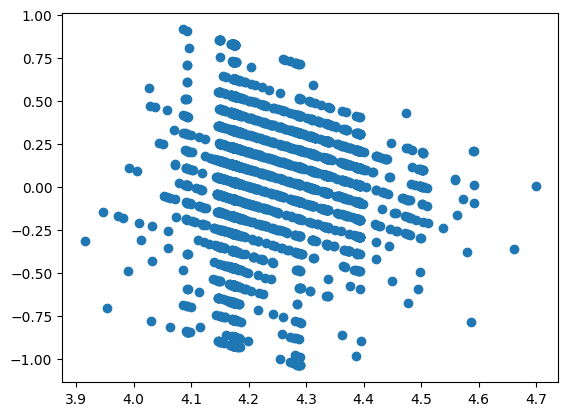

In [33]:
## Scatter plot with predictions and residuals
## Uniform distribution
plt.scatter(reg_predict,residual)

##### Performance matrics

In [36]:
print(f'Mean squared Error: {mean_squared_error(y_test,reg_predict)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,reg_predict)}')
print(f'Root Mean squared Error: {np.sqrt(mean_squared_error(y_test,reg_predict))}')

Mean squared Error: 0.16070828289303685
Mean Absolute Error: 0.30756881376365974
Root Mean squared Error: 0.4008843759652362


##### R-Squared and adjusted R square

In [39]:
score = r2_score(y_test,reg_predict)
print(score)

0.06697293841114005


In [41]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.06409411378420737

# Ridge Regression Algorithm

In [42]:
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [43]:
# Print the coeffcient
print(ridge.coef_)

[ 0.16971468 -0.00203534 -0.09431293 -0.00974407  0.03010934 -0.05455801
 -0.02888552 -0.046367   -0.0514987  -0.00103254]


In [44]:
# Print the Intercept
print(ridge.intercept_)

4.228512124406958


In [45]:
# Prediction for test data
ridge_predict = ridge.predict(X_test)
ridge_predict

array([4.2246348 , 4.09309329, 4.17036802, ..., 4.17233285, 4.25842462,
       4.17538777])

Text(0, 0.5, 'Test Predicted Data')

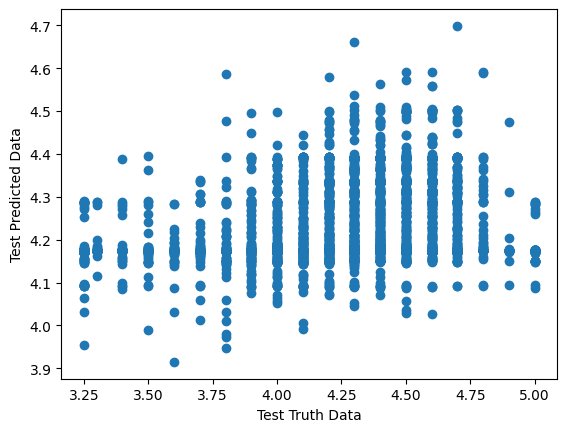

In [46]:
## Assumptions of Ridge regresssion
plt.scatter(y_test,ridge_predict)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [47]:
## Residuals 
residuals =y_test-ridge_predict
residuals

1233    -0.624635
10235   -0.693093
6412    -0.270368
5341     0.409943
2911    -0.033464
           ...   
8157     0.724536
10707   -0.474655
4632    -0.172333
2759    -0.358425
8135    -0.925388
Name: Rating, Length: 3252, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

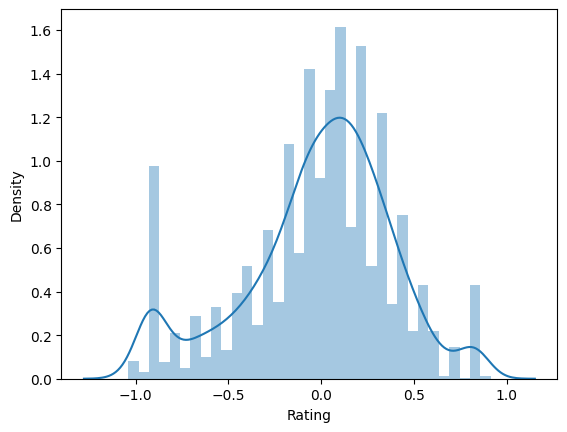

In [48]:
sns.distplot(residuals,kde=True) # Distribution of residuals

In [49]:
## Performance Metrics
print(mean_squared_error(y_test, ridge_predict))
print(mean_absolute_error(y_test, ridge_predict))
print(np.sqrt(mean_squared_error(y_test, ridge_predict)))

0.1606974514972933
0.3075687471735688
0.4008708663613425


##### R square and adjusted R square

In [50]:
score = r2_score(y_test, ridge_predict)
print(score)

0.06703582244649642


In [51]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.06415719184620794

# Lasso Regression Model 

In [53]:
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [54]:
## print the coefficients
print(lasso.coef_)

[ 0.  0.  0. -0.  0. -0.  0. -0.  0.  0.]


In [55]:
## print the intercept
print(lasso.intercept_)

4.228512124406958


In [56]:
## prediction for the test data
lasso_pred = lasso.predict(X_test)
lasso_pred

array([4.22851212, 4.22851212, 4.22851212, ..., 4.22851212, 4.22851212,
       4.22851212])

Text(0, 0.5, 'Test Predicted Data')

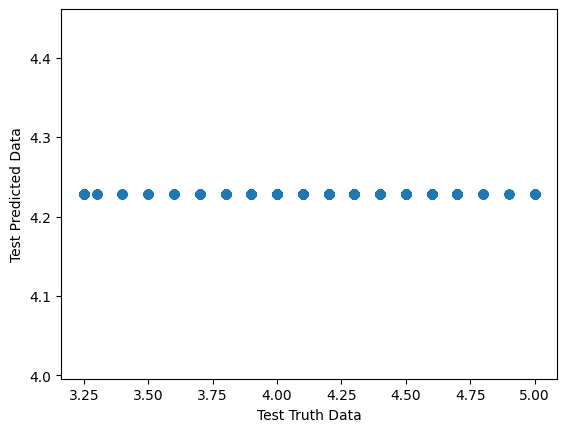

In [57]:
## Assumptions of Lasso Regression

plt.scatter(y_test, lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [58]:
## Performance Metrics
print(mean_squared_error(y_test, lasso_pred))
print(mean_absolute_error(y_test, lasso_pred))
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))

0.17240974841772194
0.32380877004605574
0.4152225287935638


##### Rsquare and adjusted R square

In [59]:
score = r2_score(y_test, lasso_pred)
print(score)

-0.0009624772266889625


In [60]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.004050914367160097

# Elastic Net Regression Model 

In [63]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)

ElasticNet()

In [64]:
## print the coefficients
print(elastic.coef_)

[ 0.  0.  0. -0.  0. -0.  0. -0.  0.  0.]


In [65]:
## print the intercept
print(elastic.intercept_)

4.228512124406958


In [66]:
## prediction for the test data
elastic_pred = elastic.predict(X_test)
elastic_pred

array([4.22851212, 4.22851212, 4.22851212, ..., 4.22851212, 4.22851212,
       4.22851212])

Text(0, 0.5, 'Test Predicted Data')

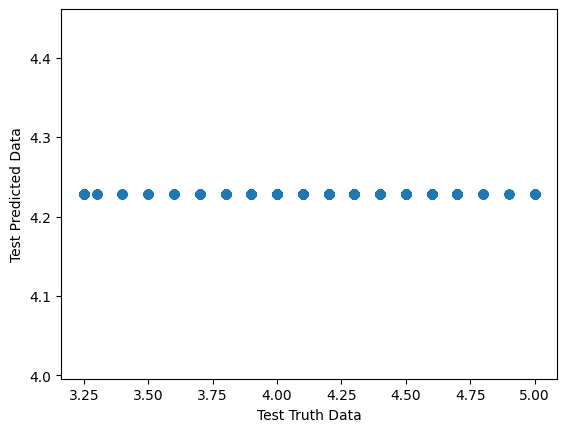

In [67]:
## Assumption of ElasticNet Regression

plt.scatter(y_test, elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [68]:
## Performance Metrics
print(mean_squared_error(y_test, elastic_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(np.sqrt(mean_squared_error(y_test, elastic_pred)))

0.17240974841772194
0.32380877004605574
0.4152225287935638


In [69]:
# R square
score = r2_score(y_test, elastic_pred)
print(score)

-0.0009624772266889625


In [70]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.004050914367160097